##### Business Problem Statement: A telecommunications company is facing high customer churn rates, which are impacting revenue and customer retention. The company wants to identify factors contributing to churn and develop strategies to reduce it.
##### How to Use This Dataset:

Descriptive Statistics: Calculate means, medians, and standard deviations for numerical fields.

Correlation Analysis: Examine relationships between variables (e.g., how AverageCallDuration relates to ChurnStatus).

Predictive Modeling: Use machine learning algorithms (e.g., logistic regression, decision trees) to predict ChurnStatus based on other variables.

Visualization: Use plots (e.g., bar charts, scatter plots) to visualize trends and correlations.

This dataset provides a starting point for exploring customer churn prediction in telecommunications, allowing you to apply various data analysis techniques to understand and predict custome. behavior.

In [186]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


In [188]:
# Set random seed for reproducibility
np.random.seed(42)

In [190]:
# Parameters for dataset generation
num_customers = 1000  # Number of customers to simulate

In [192]:
# Generate Customer IDs
customer_ids = [f"C{str(i).zfill(4)}" for i in range(1, num_customers + 1)]

In [194]:
# Generate Customer Demographics
ages = np.random.randint(18, 80, size=num_customers)  # Age between 18 and 80
locations = np.random.choice(['Urban', 'Rural', 'Suburban'], size=num_customers, p=[0.5, 0.3, 0.2])
plan_types = np.random.choice(['Basic', 'Premium'], size=num_customers, p=[0.7, 0.3])

In [196]:
# Generate Usage Patterns
average_call_duration = np.random.uniform(1, 30, size=num_customers)  # Average call duration in minutes
data_usage = np.random.uniform(0.5, 50, size=num_customers)  # Data usage in GB
number_of_calls = np.random.randint(10, 300, size=num_customers)  # Number of calls per month

In [198]:
# Generate Billing Information
monthly_charges = np.random.uniform(20, 150, size=num_customers)  # Monthly charges in dollars
payment_methods = np.random.choice(['CreditCard', 'BankTransfer'], size=num_customers, p=[0.6, 0.4])

In [200]:
# Generate Churn Status
# Churn is influenced by factors like high monthly charges, low usage, and plan type
churn_probabilities = (
    0.3 * (monthly_charges > 100) +  # Higher churn probability for high charges
    0.2 * (data_usage < 5) +        # Higher churn probability for low data usage
    0.1 * (plan_types == 'Basic')   # Higher churn probability for Basic plans
)
churn_status = np.random.choice(['Yes', 'No'], size=num_customers, p=[0.2, 0.8])

In [202]:
# Create DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Location': locations,
    'PlanType': plan_types,
    'AverageCallDuration': average_call_duration,
    'DataUsage': data_usage,
    'NumberOfCalls': number_of_calls,
    'MonthlyCharges': monthly_charges,
    'PaymentMethod': payment_methods,
    'ChurnStatus': churn_status
})


In [204]:
# Save to CSV
data.to_csv('customer_churn_data.csv', index=False)

print("Synthetic dataset generated and saved as 'customer_churn_data.csv'.")


Synthetic dataset generated and saved as 'customer_churn_data.csv'.


In [227]:
# Load dataset
data = pd.read_csv('customer_churn_data.csv')

# Display first 5 rows.
data.head()

,CustomerID,Age,Location,PlanType,AverageCallDuration,DataUsage,NumberOfCalls,MonthlyCharges,PaymentMethod,ChurnStatus
0,C0001,56,Urban,Basic,26.289402,8.821847,135,69.987056,BankTransfer,No
1,C0002,69,Rural,Basic,16.289559,24.010073,235,65.104664,CreditCard,No
2,C0003,46,Urban,Basic,19.343779,3.233515,230,76.134922,BankTransfer,Yes
3,C0004,32,Suburban,Basic,19.689638,47.147981,220,121.631377,BankTransfer,No
4,C0005,60,Rural,Basic,24.774136,4.203650,34,82.942494,CreditCard,Yes


#### Here we are checking for the missing data.As the data generated is a synthetic data we do not have any missing value otherwise the missing values are replaced by the mean,mode or median 

In [212]:
# Checking for missing values
print("\nMissingValues:")
print(data.isnull().sum())


# dataset overview
print("Dataset Overview:")
print(data.info())



MissingValues:
CustomerID             0
Age                    0
Location               0
PlanType               0
AverageCallDuration    0
DataUsage              0
NumberOfCalls          0
MonthlyCharges         0
PaymentMethod          0
ChurnStatus            0
dtype: int64
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1000 non-null   object 
 1   Age                  1000 non-null   int64  
 2   Location             1000 non-null   object 
 3   PlanType             1000 non-null   object 
 4   AverageCallDuration  1000 non-null   float64
 5   DataUsage            1000 non-null   float64
 6   NumberOfCalls        1000 non-null   int64  
 7   MonthlyCharges       1000 non-null   float64
 8   PaymentMethod        1000 non-null   object 
 9   ChurnStatus          1000 non-null   objec

## Descriptive Analysis: Mean, Median, and Mode
##### Descriptive statistics summarize and describe the features of a dataset. Three key measures of central tendency used in data analysis are Mean, Median, and Mode.
### 1. Mean (Average):
#####  The mean is the sum of all values divided by the total number of values.It represents the          central value of the dataset.
### 2.  Median:
#####   The median is the middle value when the data is sorted in ascending order.If there is an          odd number of values, the median is the middle one.If there is an even number of values,          the median is the average of the two middle values.
### 3.Mode:
#####   The mode is the most frequently occurring value in the dataset.A dataset can have one             mode (unimodal), multiple modes (bimodal/multimodal), or no mode.  




# How they are used in customer churn analysis:
#### Mean Monthly Charges help understand the average revenue per customer.
#### Median helps deal with outliers (e.g., if some customers have very high charges).
#### Mode for categorical data (e.g., the most common PlanType or PaymentMethod).


In [219]:
#descriptive analysis

def descriptive_analysis(data):
    # Select only numerical columns
    numerical_data = data.select_dtypes(include=[np.number])
    
    # Compute statistics
    mean_values = numerical_data.mean()
    median_values = numerical_data.median()
    mode_values = numerical_data.mode().iloc[0]  # `.mode()` returns a DataFrame
    
    # Print results
    print("Mean Values:\n", mean_values)
    print("\nMedian Values:\n", median_values)
    print("\nMode Values:\n", mode_values)


# Run descriptive analysis
descriptive_analysis(data)


Mean Values:
 Age                     49.857000
AverageCallDuration     16.075521
DataUsage               24.501223
NumberOfCalls          150.261000
MonthlyCharges          84.296789
dtype: float64

Median Values:
 Age                     50.000000
AverageCallDuration     16.653440
DataUsage               23.997300
NumberOfCalls          149.000000
MonthlyCharges          83.955434
dtype: float64

Mode Values:
 Age                    79.000000
AverageCallDuration     1.012841
DataUsage               0.509233
NumberOfCalls          51.000000
MonthlyCharges         20.509389
Name: 0, dtype: float64


## Correlation Analysis: 
##### Correlation analysis measures the relationship between two or more variables. It helps identify whether changes in one variable are associated          with changes in another. This is useful for understanding factors influencing customer churn.
### Positive Correlation (+1):
#####  As one variable increases, the other also increases.Example: Higher MonthlyCharges → More         likely to churn.
### Negative Correlation (-1):
##### As one variable increases, the other decreases.Example: Higher DataUsage → Less likely to         churn.
### No Correlation (0): 
##### No relationship between variables.Example: CustomerID and ChurnStatus.

## How Correlation Analysis Helps in Customer Churn Prediction
##### Identifies Key Factors: Helps find which variables strongly influence churn.
##### Feature Selection: Avoids redundant variables in machine learning models.
##### Business Insights: If MonthlyCharges and ChurnStatus are positively correlated, pricing strategies need adjustments.


Correlation Matrix:
                          Age  AverageCallDuration  DataUsage  NumberOfCalls  \
Age                  1.000000             0.012033   0.026645       0.071916   
AverageCallDuration  0.012033             1.000000  -0.012588      -0.016946   
DataUsage            0.026645            -0.012588   1.000000       0.039853   
NumberOfCalls        0.071916            -0.016946   0.039853       1.000000   
MonthlyCharges       0.004330             0.041453   0.032172      -0.024651   
ChurnStatusBinary    0.032098             0.013265  -0.015237      -0.000587   

                     MonthlyCharges  ChurnStatusBinary  
Age                        0.004330           0.032098  
AverageCallDuration        0.041453           0.013265  
DataUsage                  0.032172          -0.015237  
NumberOfCalls             -0.024651          -0.000587  
MonthlyCharges             1.000000          -0.018184  
ChurnStatusBinary         -0.018184           1.000000  


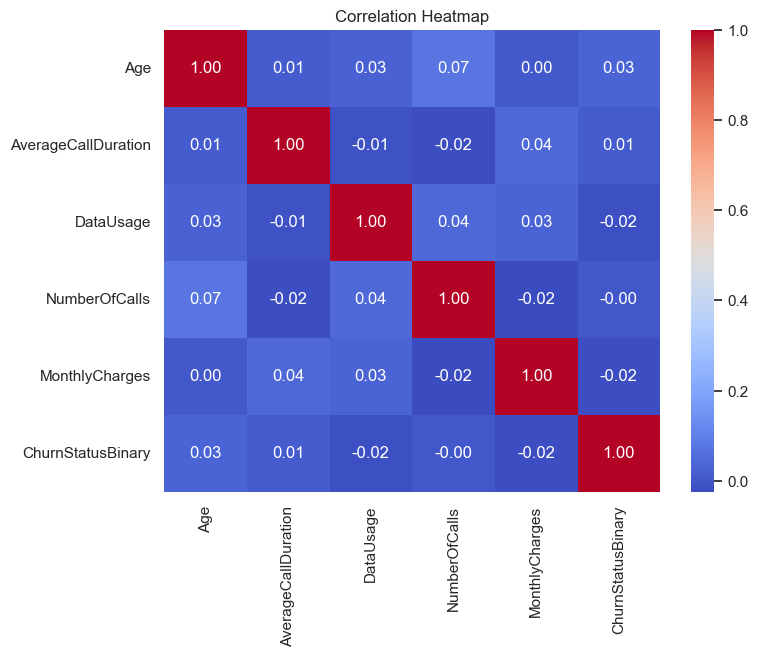

In [231]:
# Convert ChurnStatus to binary (1 for 'Yes', 0 for 'No')
data['ChurnStatusBinary'] = data['ChurnStatus'].apply(lambda x: 1 if x == 'Yes' else 0)

# Correlation matrix
correlation_matrix = data[numerical_fields + ['ChurnStatusBinary']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap: Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Visualization
#### Data visualization is the process of representing data in graphical or pictorial format. It helps in identifying patterns, trends, and insights in      the data more effectively than raw numbers.
### Why is Visualization Important?
      1.Simplifies Complex Data – Makes large datasets easier to understand.
      2.Identifies Trends & Patterns – Helps detect relationships between variables.
      3.Enhances Decision-Making – Supports business strategies with visual insights.
      4.Detects Anomalies – Identifies unusual customer behaviors (e.g., high churn risk).


### Explaination of visualization
##### 1. Churn Status Distribution (Bar Chart):Shows the count of customers who churned (Yes) versus those who did not (No).

##### 2. Average Call Duration vs Monthly Charges (Scatter Plot):Visualizes the relationship between AverageCallDuration and MonthlyCharges, with                points colored by ChurnStatus.

##### 3. Monthly Charges by Churn Status (Box Plot): Compares the distribution of MonthlyCharges for customers who churned versus those who did not.

##### 4. Correlation Heatmap: Displays the correlation matrix as a heatmap, making it easy to identify strong positive or negative relationships between variables.


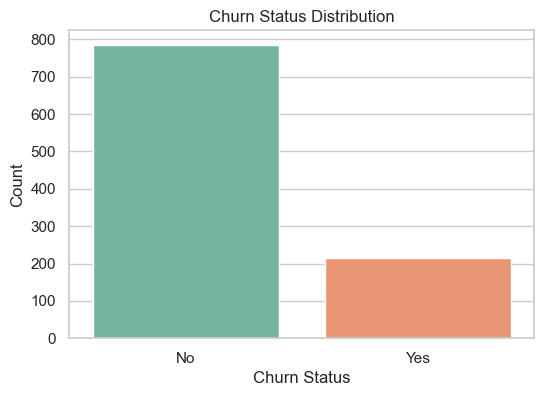

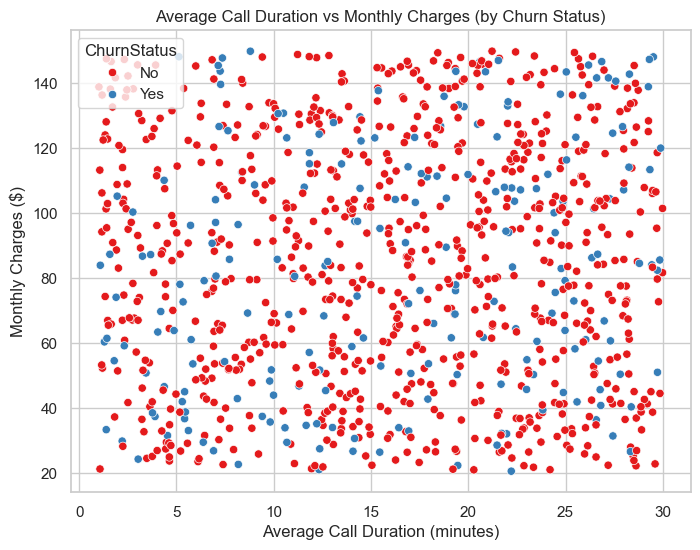

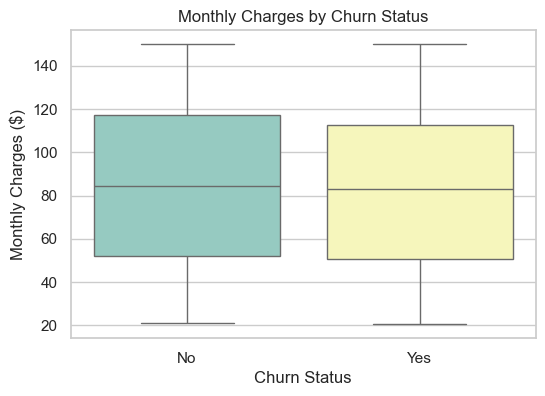

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Bar chart: Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='ChurnStatus', data=data, hue='ChurnStatus', palette='Set2', legend=False)
plt.title('Churn Status Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

# Scatter plot: AverageCallDuration vs MonthlyCharges (colored by ChurnStatus)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AverageCallDuration', y='MonthlyCharges', hue='ChurnStatus', data=data, palette='Set1')
plt.title('Average Call Duration vs Monthly Charges (by Churn Status)')
plt.xlabel('Average Call Duration (minutes)')
plt.ylabel('Monthly Charges ($)')
plt.show()

# Box plot: MonthlyCharges by ChurnStatus
plt.figure(figsize=(6, 4))
sns.boxplot(x='ChurnStatus', y='MonthlyCharges',  hue='ChurnStatus', data=data, palette='Set3')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.show()



## Based on the analysis of the synthetic customer churn dataset, we can derive actionable recommendations to reduce churn. These recommendations are      grounded in the identified trends and correlations from the data. Here's a structured conclusion with actionable strategies:

### Key Findings from the Analysis
#### 1.High Monthly Charges Lead to Churn:
       Customers with higher monthly charges are more likely to churn.The correlation between MonthlyCharges and ChurnStatus is negative, indicating that as charges increase, the likelihood of churn also increases.

#### 2.Low Data Usage and Call Duration:
       Customers with low data usage (DataUsage < 5 GB) and shorter call durations(AverageCallDuration < 10 minutes) are more likely to churn.These customers may not be fully utilizing their plans, leading to dissatisfaction.

#### 3.Basic Plan Customers Are More Likely to Churn:
       Customers on the Basic plan have a higher churn probability compared to those on the Premium plan.This suggests that the Basic plan may not be meeting customer expectations.

#### 4.Urban Customers Have Higher Churn Rates:
       Urban customers are more likely to churn compared to rural or suburban customers, possibly due to higher competition or greater expectations for service quality.

## Recommendations to Reduce Churn
### 1. Targeted Promotions and Discounts
#### High-Risk Customers: 
     Identify customers with high monthly charges and offer them targeted discounts or loyalty rewards to retain them.
#### Low-Usage Customers:
     Provide incentives for customers with low data usage or call durations, such as bonus data or free call minutes, to encourage engagement.

### 2. Plan Adjustments
#### Revise Basic Plans: 
     Improve the value proposition of the Basic plan by including additional features (e.g., more data, free streaming services) to make it more competitive.
#### Flexible Plans: 
     Introduce flexible plans that allow customers to customize their data, call minutes, and other features based on their usage patterns.

### 3. Improved Customer Service
#### Proactive Outreach:
     Reach out to customers who show signs of dissatisfaction (e.g., low usage, high charges) to understand their concerns and offer solutions.
#### Personalized Support:
     Use customer data to provide personalized recommendations and support, such as suggesting a better-suited plan or resolving billing issues promptly.

### 4. Enhance Service Quality for Urban Customers
#### Network Improvements:
     Invest in improving network quality and coverage in urban areas to meet the higher expectations of urban customers.
#### Exclusive Urban Offers:
     Provide exclusive promotions or services tailored to urban customers, such as partnerships with local businesses or entertainment providers.

### 5. Engagement Campaigns
#### Usage Encouragement: 
     Launch campaigns to educate customers on how to maximize their plan benefits, such as tutorials on data-saving features or free trials of premium services.
#### Community Building: 
    Create a sense of community among customers through loyalty programs, referral incentives, or social media engagement.

### 6. Predictive Analytics for Early Intervention
#### Churn Prediction Model:
     Develop a machine learning model to predict churn risk based on customer behavior and demographics. Use this model to proactively target at-risk customers with retention strategies.
#### Real-Time Alerts:
     Implement real-time monitoring of customer behavior (e.g., sudden drop in usage) and trigger alerts for immediate intervention.



## Expected Outcomes
#### Reduced Churn Rate: 
         By addressing the key factors contributing to churn, the overall churn rate is expected to decrease.

#### Increased Customer Satisfaction: 
         Improved plans, better service, and personalized support will enhance customer satisfaction and loyalty.

#### Higher Revenue: 
         Retaining customers and encouraging higher usage will lead to increased revenue and profitability.